In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [55]:
train = pd.read_csv('./datasets/train.csv')

In [56]:
train.shape

(2051, 81)

In [57]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [58]:
#renaming all columns to lowercase/replacing spaces with '_' for consistency
train.columns = [x.lower().replace(' ','_') for x in train.columns]

In [59]:
train.head(1)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


# Handling Null Values:


In [60]:
#sorting the columns with the highest number of null values in
#descending order
null_vals = pd.DataFrame([train.isnull().sum()]).T

In [61]:
null_vals = null_vals.rename(columns={0:"sum_of_nulls"})

In [62]:
#calculating percentage of nulls over total rows:
null_vals['missing_pct']=null_vals.apply(lambda row: row['sum_of_nulls']/len(train), axis=1)

In [63]:
#sorting the features with highest missing % in descending order
null_vals.sort_values(by='missing_pct',ascending=False).head(10)

,sum_of_nulls,missing_pct
pool_qc,2042,0.995612
misc_feature,1986,0.968308
alley,1911,0.931741
fence,1651,0.804973
fireplace_qu,1000,0.487567
lot_frontage,330,0.160897
garage_finish,114,0.055583
garage_qual,114,0.055583
garage_yr_blt,114,0.055583
garage_cond,114,0.055583


In [64]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [65]:
train['pool_area'].replace(0,np.nan, inplace=True)
train['pool_area'].isnull().value_counts()

True     2042
False       9
Name: pool_area, dtype: int64

In [67]:
#Checking that non-null rows of Pool Area are the same non-null rows of
#Pool QC so that we know  they correspond to each other

train[(train['pool_area'].notna()) | (train['pool_qc'].notna())][['pool_area','pool_qc']]

,pool_area,pool_qc
52,519.0,Fa
657,576.0,Gd
761,800.0,Gd
952,228.0,Ex
960,480.0,Gd
1130,648.0,Fa
1249,738.0,Gd
1635,368.0,TA
1875,561.0,TA


Columns with a high count of null values:

1) pool_qc - Pool Quality - Ordinal (2042 null values)
   -> Pool QC is non-null only in rows where Pool Area is also non-null.
   This column will be **dropped**. Pool QC is dependent on Pool Area        being a non-null value. There    are only a limited number of      datapoints that have pools, and as checked above, these are the same values that are non-null in pool_qc.
   
2) pool_area - This will also be dropped, as 2042 datapoints do not have    pools.
   
2) misc_feature - Nominal (1986 null values)
   -> This column will be **dropped**, as there isn't a lot of              information    on    Misc Features and majority (96.8%) of these data      points are left blank.

3) alley - Alley Access Type - Nominal (1911 null values)
   -> This column will be **dropped**, as a large proportion (93.2%) of the    total dataset is recorded as Null - No Alley Access
   
4) fence - Fence Quality - Ordinal (1651 null values)
   -> This column will **dropped**, as only about 20% of datapoints have
   this value as a non-null.
   
5) fireplace_qu - Fireplace Quality - Ordinal (1000 null values)
    -> This column will not be dropped yet, but instead go through
    ordinal encoding.

In [68]:
#dropping Misc Feature and Alley columns
train.drop(columns=['misc_feature','alley', 'pool_qc', 'pool_area', 'pid', 'fence'], inplace=True)

# Ordinal Encoding for Ordinal Features

**FEATURES THAT NEED TO BE ORDINALLY ENCODED:**



In [69]:
#ORDINAL ENCODING FOR COL: LOT SHAPE
lotshape_ordinal = {'Reg': 4,
                    'IR1': 3,
                    'IR2': 2,
                    'IR3': 1}

train['lot_shape'] = train['lot_shape'].apply(lambda x:
                                              lotshape_ordinal[x] 
                                              if x in lotshape_ordinal 
                                              else np.nan)

#ORDINAL ENCODING FOR COL: UTILITIES
utilities_ordinal = {'AllPub':4,
                     'NoSwer':3,
                     'NoSeWa':2,
                     'ELO':1}

train['utilities'] = train['utilities'].apply(lambda x:
                                              utilities_ordinal[x] 
                                              if x in utilities_ordinal 
                                              else np.nan)

#ORDINAL ENCODING FOR COL: UTILITIES
landslope_ordinal = {'Gtl':3,
                     'Mod':2,
                     'Sev':1}

train['land_slope'] = train['land_slope'].apply(lambda x:
                                                landslope_ordinal[x] 
                                                if x in landslope_ordinal 
                                                else np.nan)

#ORDINAL ENCODING FOR COL: OVERALL QUAL & OVERAL COND NOT NECESSARY
#AS ALREADY RANKED

#ORDINAL ENCODING FOR COL: EXTER QUAL
exterqual_ordinal = {'Ex':5,
                     'Gd':4,
                     'TA':3,
                     'Fa':2,
                     'Po':1}

train['exter_qual'] = train['exter_qual'].apply(lambda x:
                                                exterqual_ordinal[x] 
                                                if x in exterqual_ordinal 
                                                else np.nan)


#ORDINAL ENCODING FOR COL: EXTER COND
extercond_ordinal = {'Ex':5,
                     'Gd':4,
                     'TA':3,
                     'Fa':2,
                     'Po':1}

train['exter_cond'] = train['exter_cond'].apply(lambda x:
                                                extercond_ordinal[x] 
                                                if x in extercond_ordinal 
                                                else np.nan)

#ORDINAL ENCODING FOR COL: BSMT QUAL, NA TO RESULT IN 0
bsmtqual_ordinal = {'Ex':5,
                    'Gd':4,
                    'TA':3,
                    'Fa':2,
                    'Po':1,
                    'NA':0}

train['bsmt_qual'] = train['bsmt_qual'].apply(lambda x:
                                              bsmtqual_ordinal[x] 
                                              if x in bsmtqual_ordinal 
                                              else np.nan)

#ORDINAL ENCODING FOR COL: BSMT COND, NA TO RESULT IN 0
bsmtcond_ordinal = {'Ex':5,
                    'Gd':4,
                    'TA':3,
                    'Fa':2,
                    'Po':1,
                    'NA':0}

train['bsmt_cond'] = train['bsmt_cond'].apply(lambda x:
                                              bsmtcond_ordinal[x] 
                                              if x in bsmtcond_ordinal 
                                              else np.nan)

#ORDINAL ENCODING FOR COL: BSMT EXPOSURE, NA TO RESULT IN 0
bsmtexposure_ordinal = {'Gd':4,
                        'Av':3,
                        'Mn':2,
                        'No':1,
                        'NA':0}

train['bsmt_exposure'] = train['bsmt_exposure'].apply(lambda x:
                                              bsmtexposure_ordinal[x] 
                                              if x in bsmtexposure_ordinal 
                                              else np.nan)

#ORDINAL ENCODING FOR COL: BSMTFIN, NA TO RESULT IN 0
bsmtfin_ordinal = {'GLQ':6,
                   'ALQ':5,
                   'BLQ':4,
                   'Rec':3,
                   'LwQ':2,
                   'Unf':1,
                   'NA':0}

train['bsmtfin_type_1'] = train['bsmtfin_type_1'].apply(lambda x:
                                                        bsmtfin_ordinal[x] 
                                                        if x in bsmtfin_ordinal 
                                                        else np.nan)


#ORDINAL ENCODING FOR COL: BSMTFINTYPE 2, NA TO RESULT IN 0
bsmtfintype2_ordinal = {'GLQ':6,
                        'ALQ':5,
                        'BLQ':4,
                        'Rec':3,
                        'LwQ':2,
                        'Unf':1,
                        'NA':0}

train['bsmtfin_type_2'] = train['bsmtfin_type_2'].apply(lambda x:
                                              bsmtfintype2_ordinal[x] 
                                              if x in bsmtfintype2_ordinal 
                                              else np.nan)


#ORDINAL ENCODING FOR COL: HEATINGQC
heatingqc_ordinal = {'Ex':5,
                     'Gd':4,
                     'TA':3,
                     'Fa':2,
                     'Po':1}
                    
train['heating_qc'] = train['heating_qc'].apply(lambda x:
                                              heatingqc_ordinal[x] 
                                              if x in heatingqc_ordinal
                                              else np.nan)

#ORDINAL ENCODING FOR COL: ELECTRICAL
elec_ordinal = {'SBrkr':5,
                'FusaA':4,
                'FuseF':3,
                'FuseP':2,
                'Mix':1}
                    
train['electrical'] = train['electrical'].apply(lambda x:
                                                elec_ordinal[x] 
                                                if x in elec_ordinal
                                                else np.nan)

#ORDINAL ENCODING FOR COL: KitchenQual
kitchenqual_ordinal = {'Ex':5,
                       'Gd':4,
                       'TA':3,
                       'Fa':2,
                       'Po':1}
                    
train['kitchen_qual'] = train['kitchen_qual'].apply(lambda x:
                                                  kitchenqual_ordinal[x] 
                                                  if x in kitchenqual_ordinal
                                                  else np.nan)

#ORDINAL ENCODING FOR COL: FUNCTIONAL
homefunctlty_ordinal = {'Typ':8,
                        'Min1':7,
                        'Min2':6,
                        'Mod':5,
                        'Maj1':4,
                        'Maj2':3,
                        'Sev':2,
                        'Sal':1}
                    
train['functional'] = train['functional'].apply(lambda x:
                                                homefunctlty_ordinal[x] 
                                                if x in homefunctlty_ordinal
                                                else np.nan)

#ORDINAL ENCODING FOR COL: FIREPLACEQU, NA TO RESULT IN 0
fireplacequal_ordinal = {'Ex':5,
                        'Gd':4,
                        'TA':3,
                        'Fa':2,
                        'Po':1,
                        'NA':0}

train['fireplace_qu'] = train['fireplace_qu'].apply(lambda x:
                                                  fireplacequal_ordinal[x] 
                                                  if x in fireplacequal_ordinal 
                                                  else np.nan)


#ORDINAL ENCODING FOR COL: GARAGE FINISH, NA TO RESULT IN 0
garagefinish_ordinal = {'Fin':3,
                        'RFn':2,
                        'Unf':1,
                        'NA':0}

train['garage_finish'] = train['garage_finish'].apply(lambda x:
                                                      garagefinish_ordinal[x] 
                                                      if x in garagefinish_ordinal 
                                                      else np.nan)


#ORDINAL ENCODING FOR COL: GARAGE QUAL, NA TO RESULT IN 0
garagequal_ordinal = {'Ex':5,
                      'Gd':4,
                      'TA':3,
                      'Fa':2,
                      'Po':1,
                      'NA':0}

train['garage_qual'] = train['garage_qual'].apply(lambda x:
                                              garagequal_ordinal[x] 
                                              if x in garagequal_ordinal 
                                              else np.nan)

#ORDINAL ENCODING FOR COL: GARAGE COND, NA TO RESULT IN 0
garagecond_ordinal = {'Ex':5,
                      'Gd':4,
                      'TA':3,
                      'Fa':2,
                      'Po':1,
                      'NA':0}

train['garage_cond'] = train['garage_cond'].apply(lambda x:
                                                  garagecond_ordinal[x] 
                                                  if x in garagecond_ordinal 
                                                  else np.nan)

#ORDINAL ENCODING FOR COL: PAVED DRIVE, NA TO RESULT IN 0
paveddrive_ordinal = {'Y':2,
                      'P':1,
                      'N':0}

train['paved_drive'] = train['paved_drive'].apply(lambda x:
                                                  paveddrive_ordinal[x] 
                                                  if x in paveddrive_ordinal 
                                                  else np.nan)


# Handling Outliers

Outliers to look out for:

1) Gr Liv Area (Continuous): Above grade (ground) living area(sqft)

2) Lot Area (Continuous): Lot size in square feet


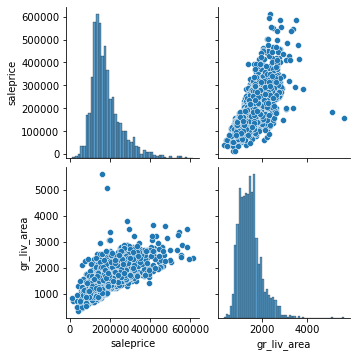

In [70]:
#plotting Sale Price against Ground living area in square feet
saleprice_grlivarea = train[['saleprice','gr_liv_area']]
sns.pairplot(saleprice_grlivarea);

In [71]:
#Filtering for and removing houses with more than 4000 sqft - outliers
train[train['gr_liv_area']>4000]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,60,RL,313.0,63887,Pave,1,Bnk,4.0,Corner,...,214,292,0,0,0,0,1,2008,New,160000
1885,2181,20,RL,128.0,39290,Pave,3,Bnk,4.0,Inside,...,546,484,0,0,0,17000,10,2007,New,183850


In [72]:
#dropping above outliers
train.drop(train.index[[960,1885]], inplace=True)

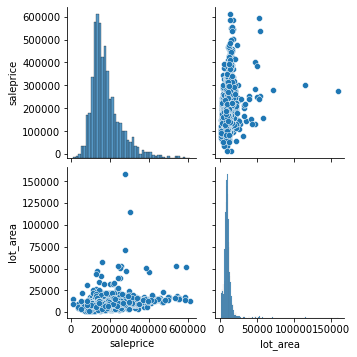

In [73]:
#checking outliers for lot area
saleprice_lotarea = train[['saleprice','lot_area']]
sns.pairplot(saleprice_lotarea);

In [74]:
#identifying outliers - threshold used: 75,000sqft
train[train['lot_area']>75000]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,misc_val,mo_sold,yr_sold,sale_type,saleprice
471,2116,50,RL,NaN,159000,Pave,2,Low,4.0,CulDSac,...,0,98,0,0,0,500,6,2007,WD,277000
694,2072,20,RL,NaN,115149,Pave,2,Low,4.0,CulDSac,...,380,48,0,0,0,0,6,2007,WD,302000


In [75]:
#dropping above outliers
train.drop(train.index[[471,694]], inplace=True)

In [76]:
train.shape

(2047, 75)

In [77]:
#replacing null values with 0s
train.replace(np.nan, 0, inplace=True)

In [78]:
train.isnull().sum()

id              0
ms_subclass     0
ms_zoning       0
lot_frontage    0
lot_area        0
               ..
misc_val        0
mo_sold         0
yr_sold         0
sale_type       0
saleprice       0
Length: 75, dtype: int64

## EDA SECTION ##

In [79]:
train.to_csv('./datasets/train_cleaned.csv')

In [80]:
train.shape 

(2047, 75)

**Boxplots & Countplots For Nominal Features**

Plots will be grouped into types of nominal features and be plotted accordingly.

In [81]:
def subplot_boxcountplot(dataframe, list_of_features, figsize=(20,10)):
    fig, ax = plt.subplots(nrows=len(list_of_features), 
                           ncols=2,
                           figsize=figsize)
    ax=ax.ravel()
    
    for i, feature in enumerate(list_of_features):
        # left col: boxplot
        sns.boxplot(
            ax=ax[2*i],
            data=dataframe,
            x=feature,
            y='saleprice',
            orient='v',
            linewidth=1,
            palette='husl'
        );
        ax[2*i].set_xticklabels(ax[2*i].get_xticklabels(),rotation=45, size=15)
        ax[2*i].set_xlabel(feature, fontsize = 20)
        ax[2*i].set_ylabel('Sale Price', fontsize = 20)

        # right col: countplot
        sns.countplot(x=feature,
                      ax=ax[2*i+1],
                      data=dataframe,                      
                      palette='husl',      
                     );
        
        ax[2*i+1].set_xticklabels(ax[2*i+1].get_xticklabels(),rotation=45, size=15)
        ax[2*i+1].set_xlabel(feature, fontsize = 20)
        ax[2*i+1].set_ylabel("Count", fontsize = 20)
        fig.tight_layout(pad=3.0)
        
    return fig,ax

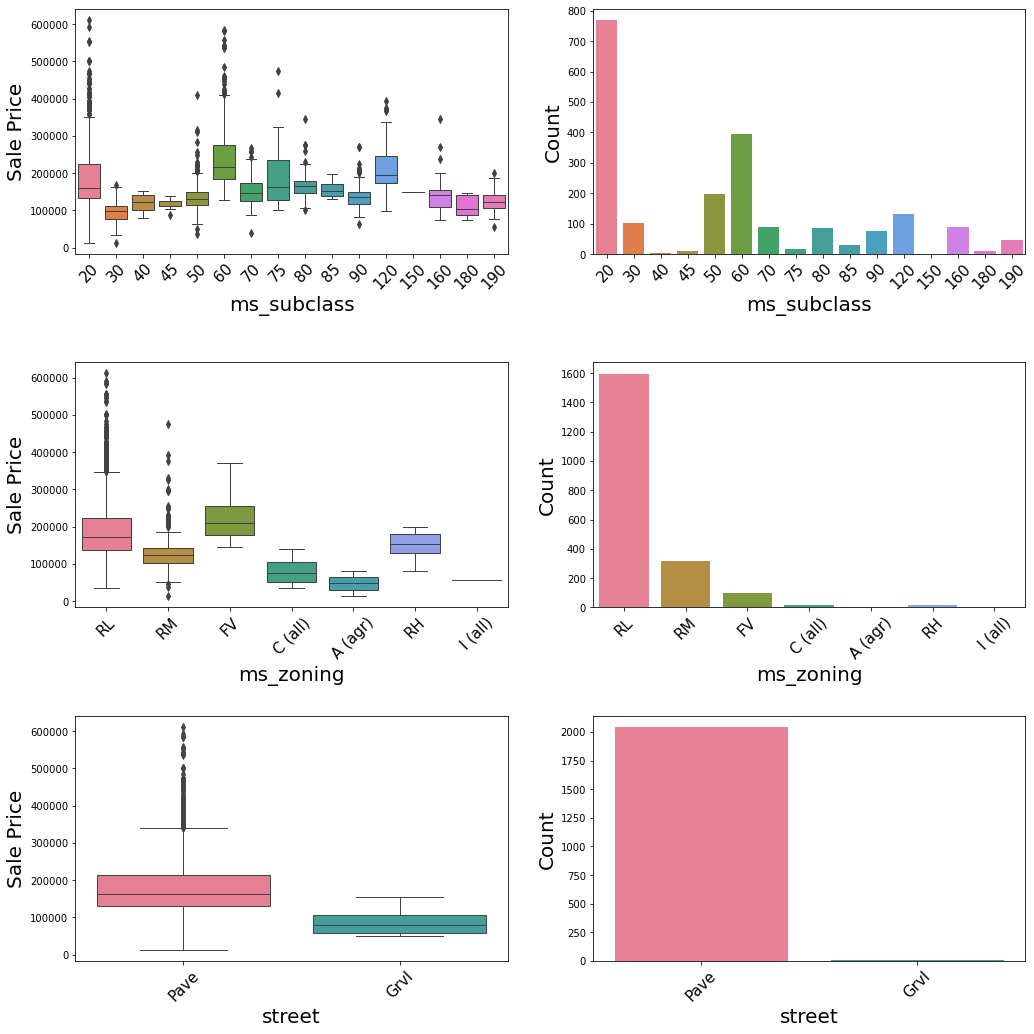

In [82]:
features_list1 = ['ms_subclass','ms_zoning','street']

subplot_boxcountplot(train, features_list1, figsize=(15,15));

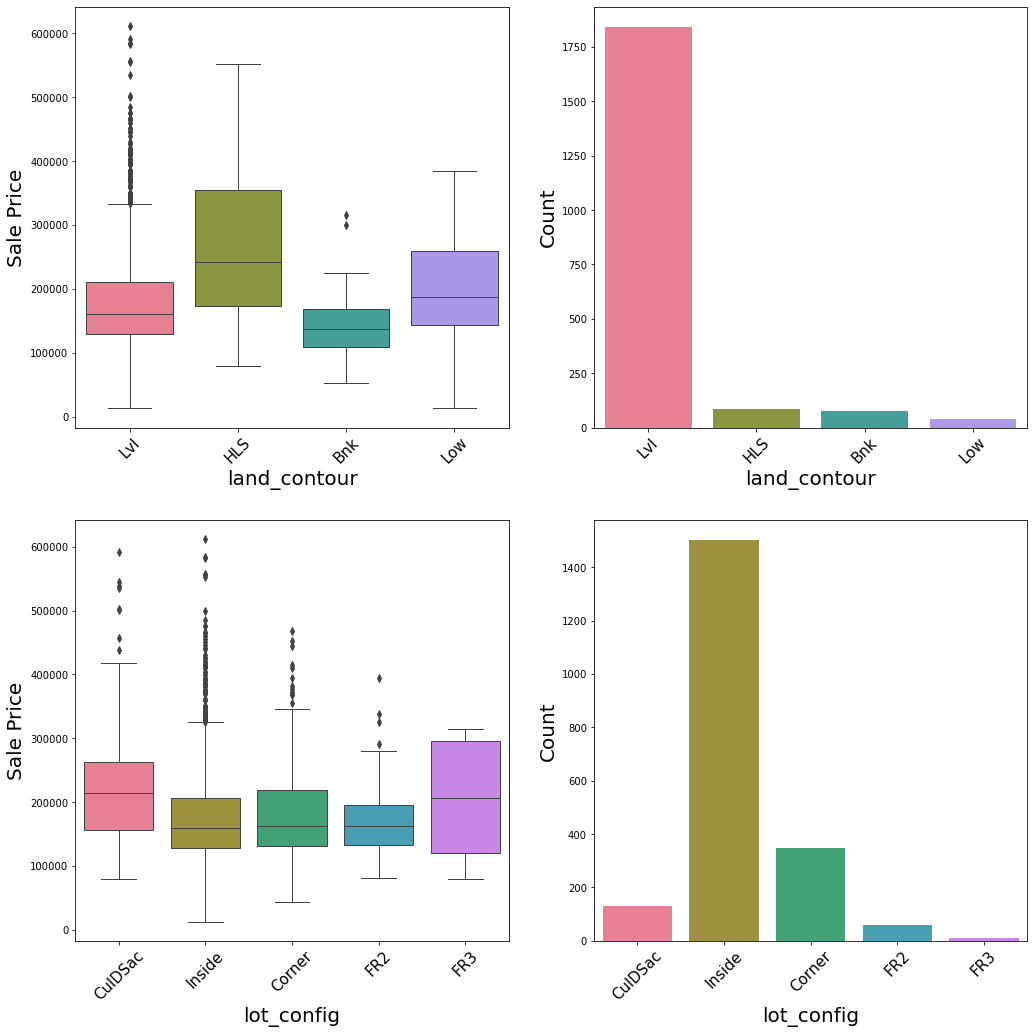

In [83]:
features_list2 = ['land_contour','lot_config']
subplot_boxcountplot(train, features_list2, figsize=(15,15));

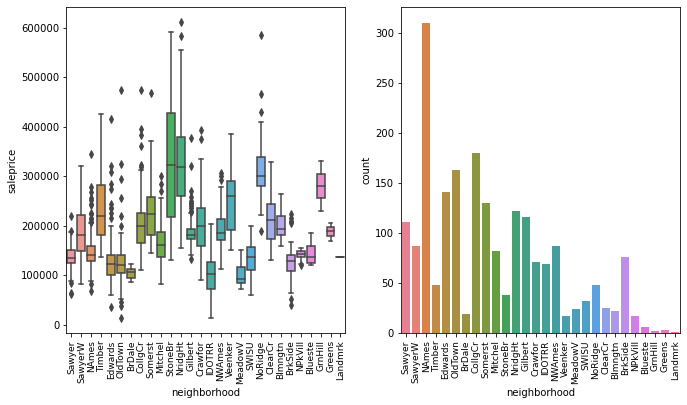

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
feat3_1 = sns.boxplot(x="neighborhood", y="saleprice", data=train, ax=ax[0]);
feat3_2 = sns.countplot(x="neighborhood", data=train, palette="husl");
feat3_1.set_xticklabels(feat3_1.get_xticklabels(),rotation=90, size=9);
feat3_2.set_xticklabels(feat3_2.get_xticklabels(),rotation=90, size=9);

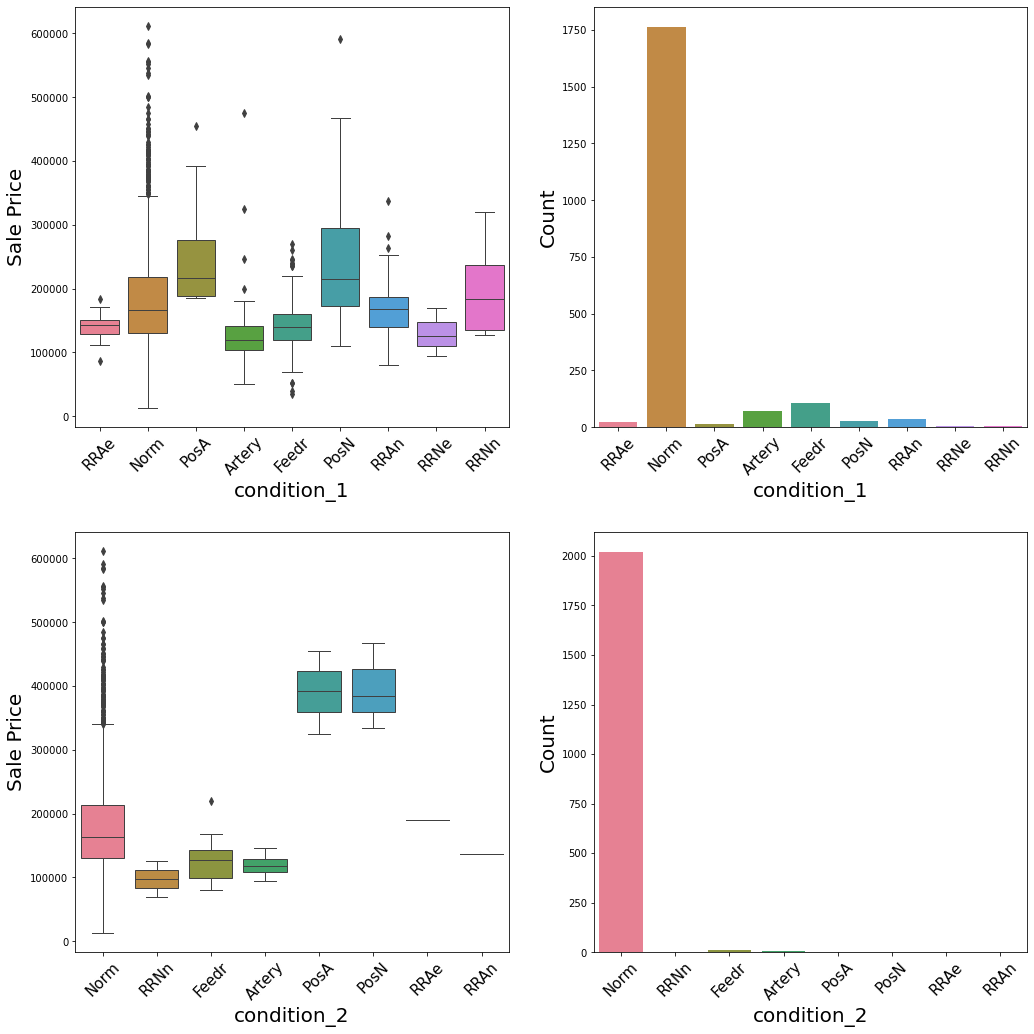

In [85]:
features_list4 = ['condition_1','condition_2']
subplot_boxcountplot(train, features_list4, figsize=(15,15));

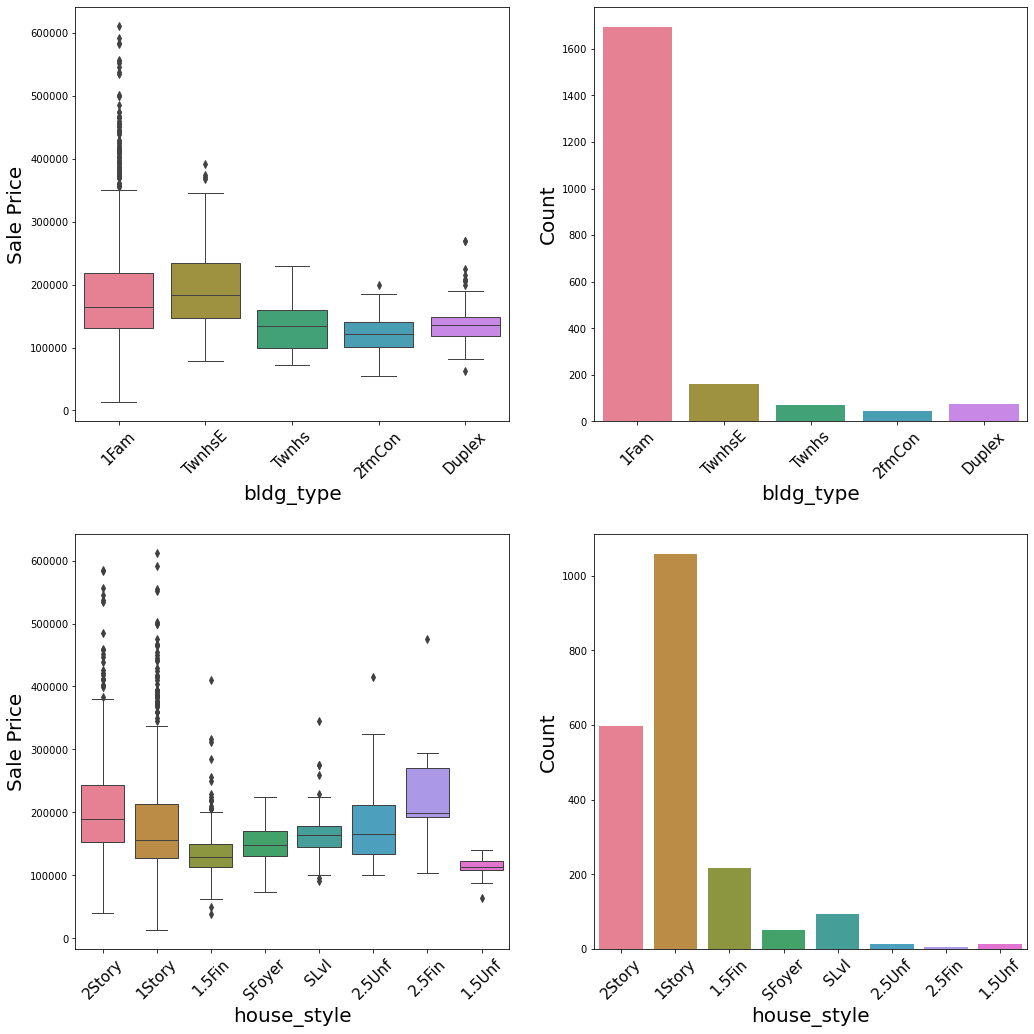

In [86]:
features_list5 = ['bldg_type','house_style']
subplot_boxcountplot(train, features_list5, figsize=(15,15));

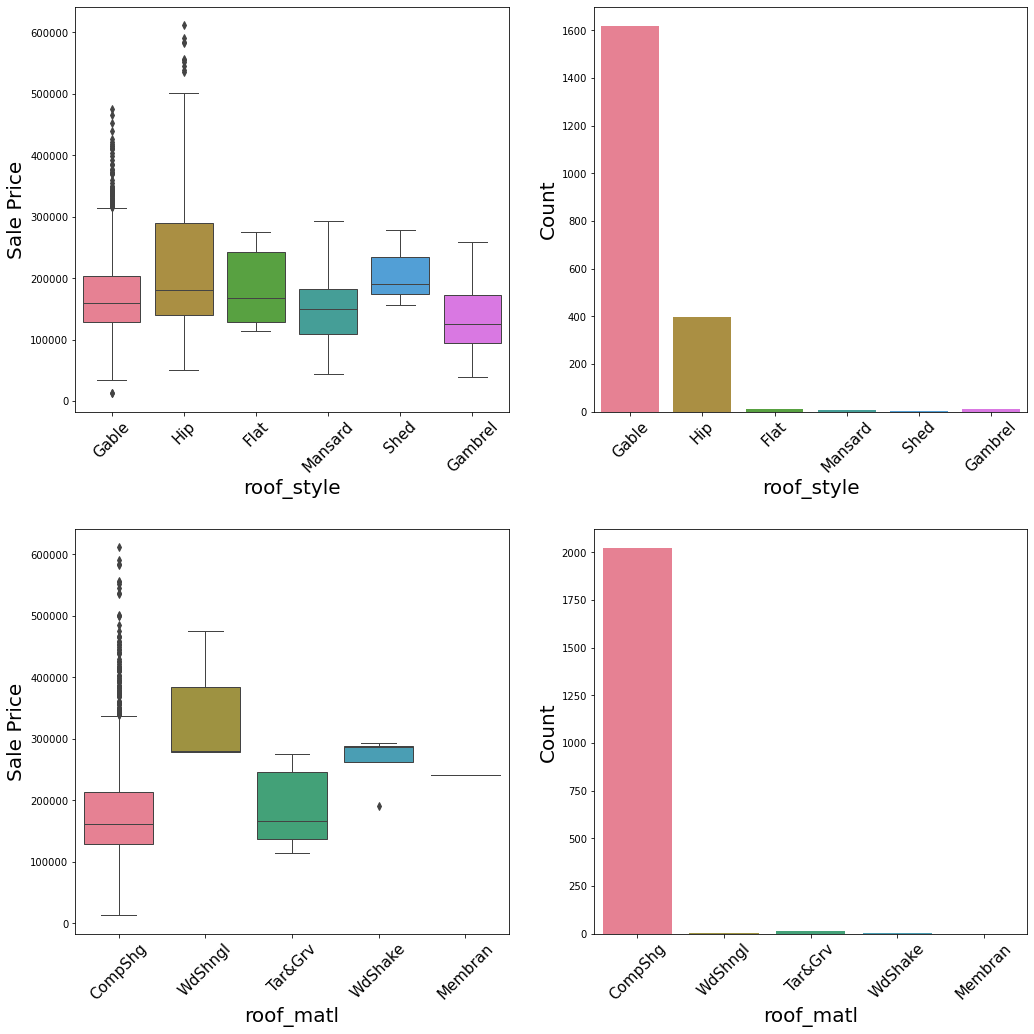

In [87]:
features_list6 = ['roof_style','roof_matl']
subplot_boxcountplot(train, features_list6, figsize=(15,15));

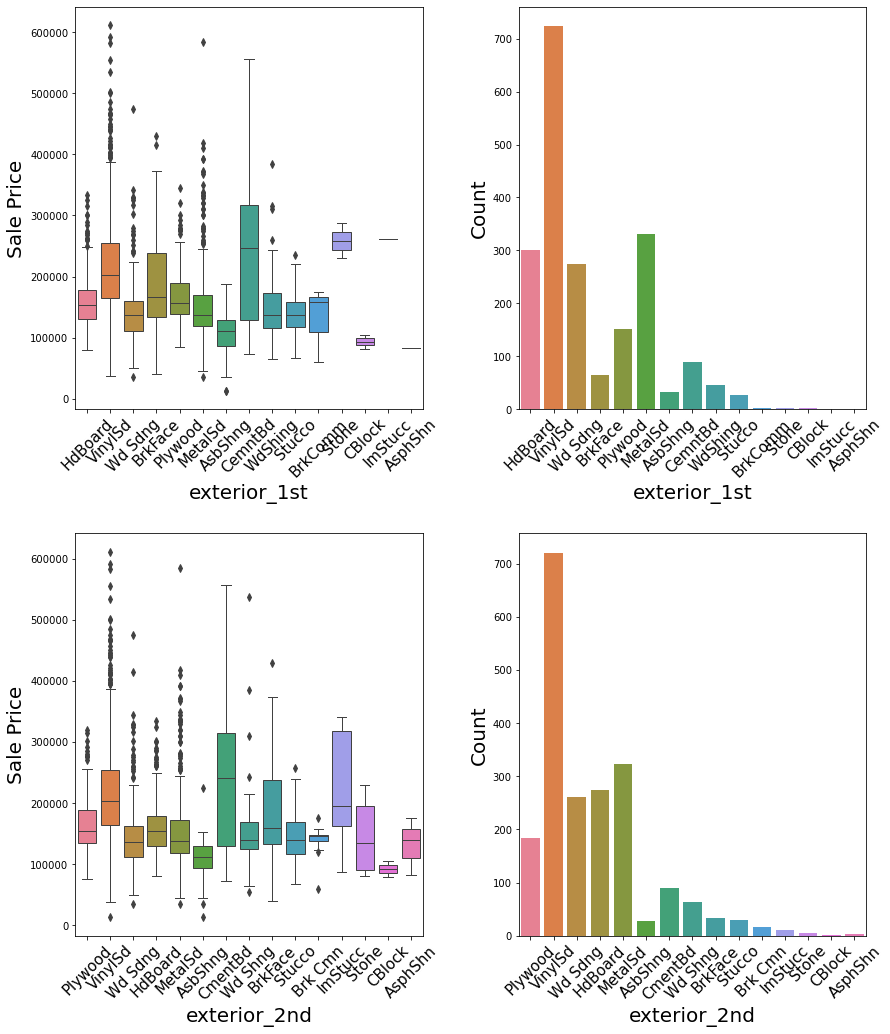

In [88]:
features_list7 = ['exterior_1st','exterior_2nd']
subplot_boxcountplot(train, features_list7, figsize=(13,15));

**Neighborhood (Nominal)**: Physical locations within Ames city limits (map available)

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       Greens	Greens
       GrnHill	Green Hills
       IDOTRR	Iowa DOT and Rail Road
       Landmrk	Landmark
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

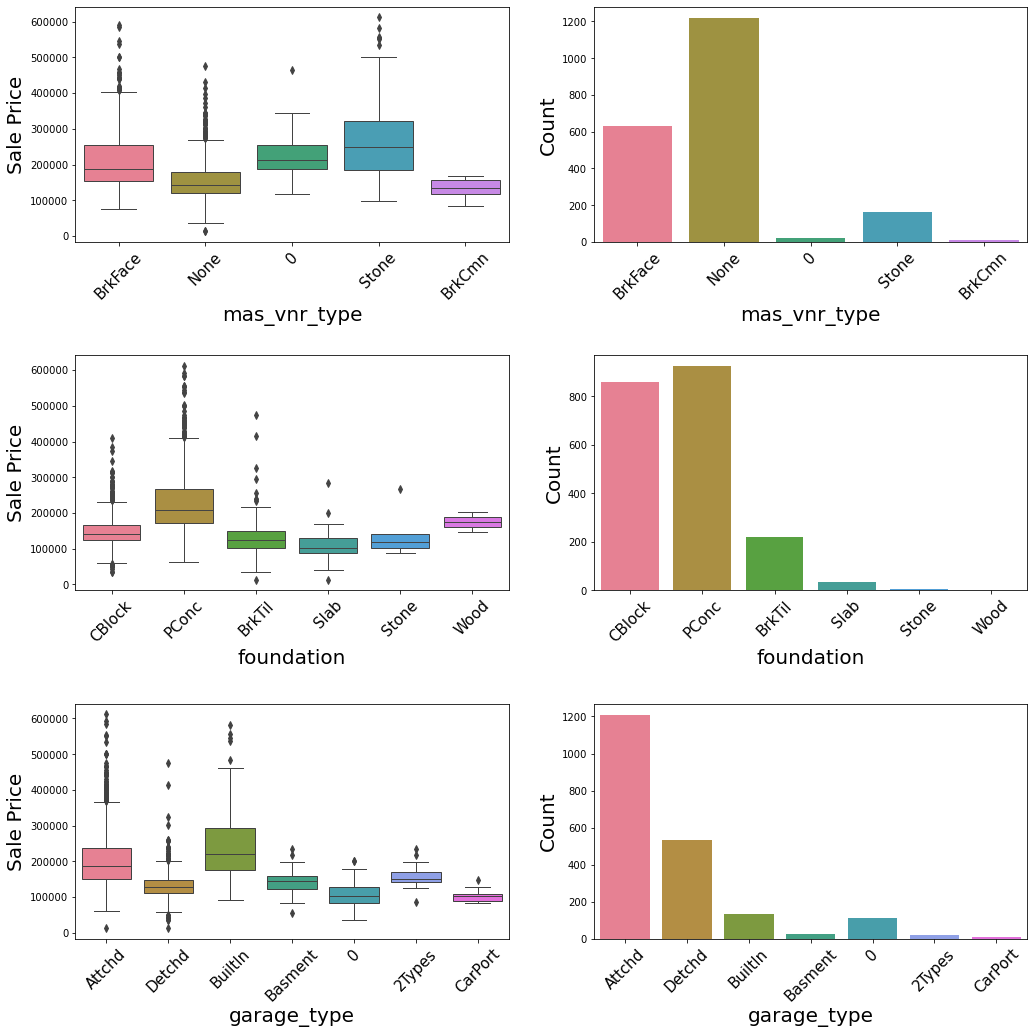

In [89]:
features_list7 = ['mas_vnr_type','foundation', 'garage_type']
subplot_boxcountplot(train, features_list7, figsize=(15,15));

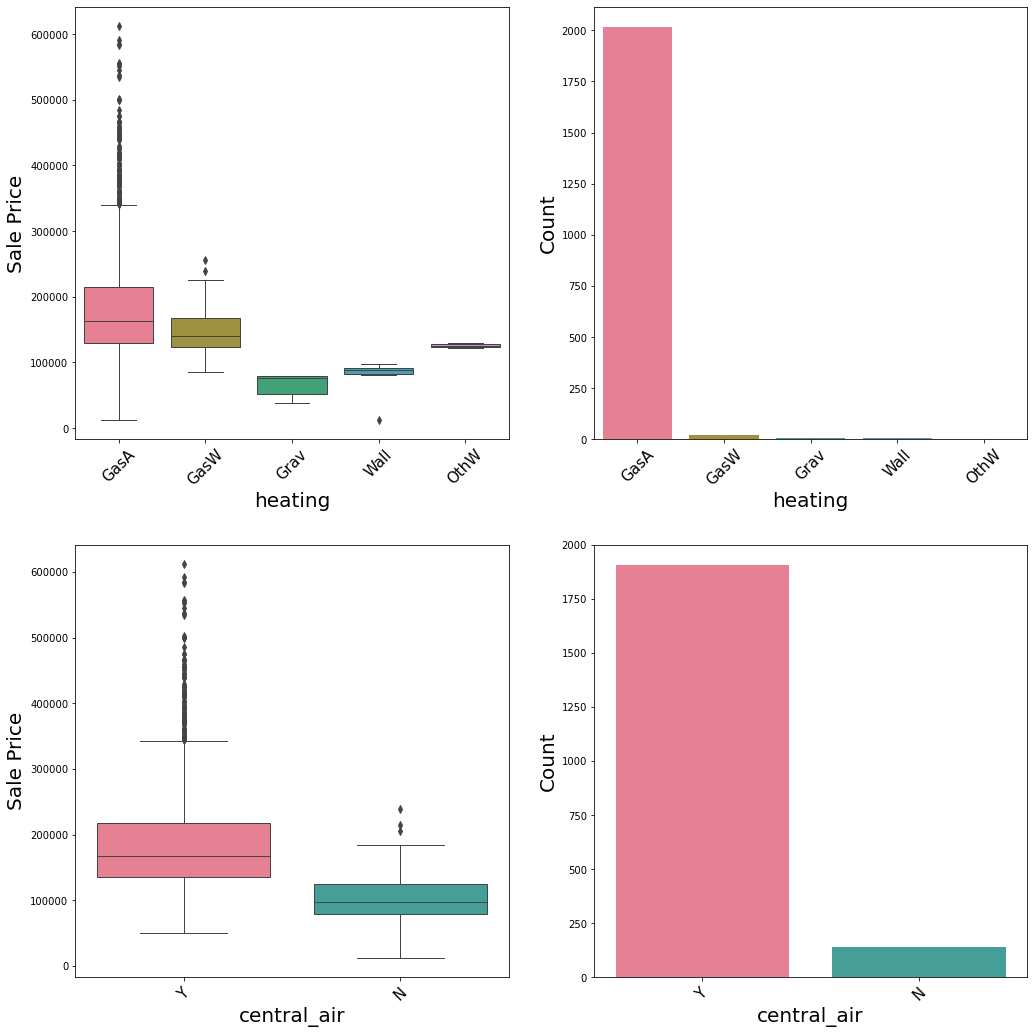

In [90]:
features_list8 = ['heating','central_air']
subplot_boxcountplot(train, features_list8, figsize=(15,15));

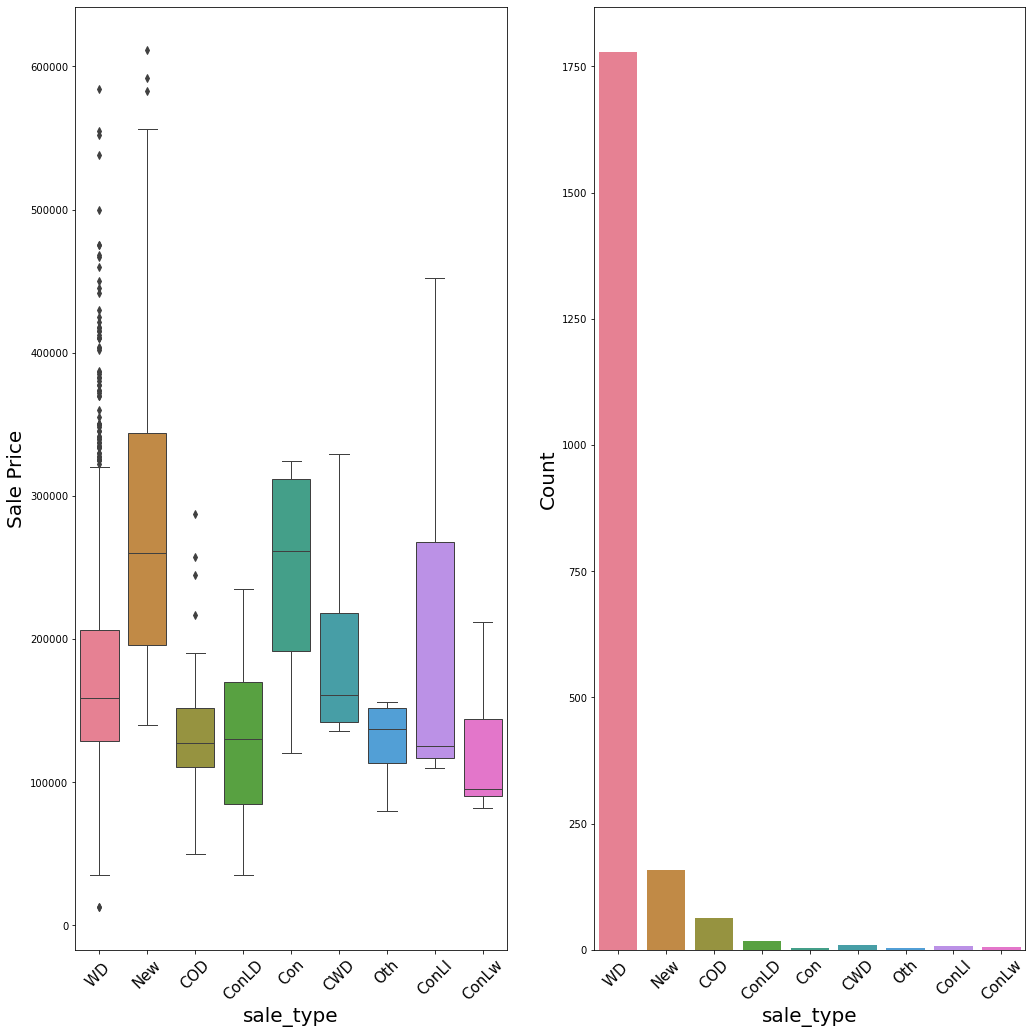

In [91]:
features_list9 = ['sale_type']
subplot_boxcountplot(train, features_list9, figsize=(15,15));